In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
print("numpy",np.__version__)
print("pandas",pd.__version__)


numpy 2.3.4
pandas 2.3.3


In [3]:
housing=pd.read_csv("housing.csv")


In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.shape

(20640, 10)

In [6]:
housing.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

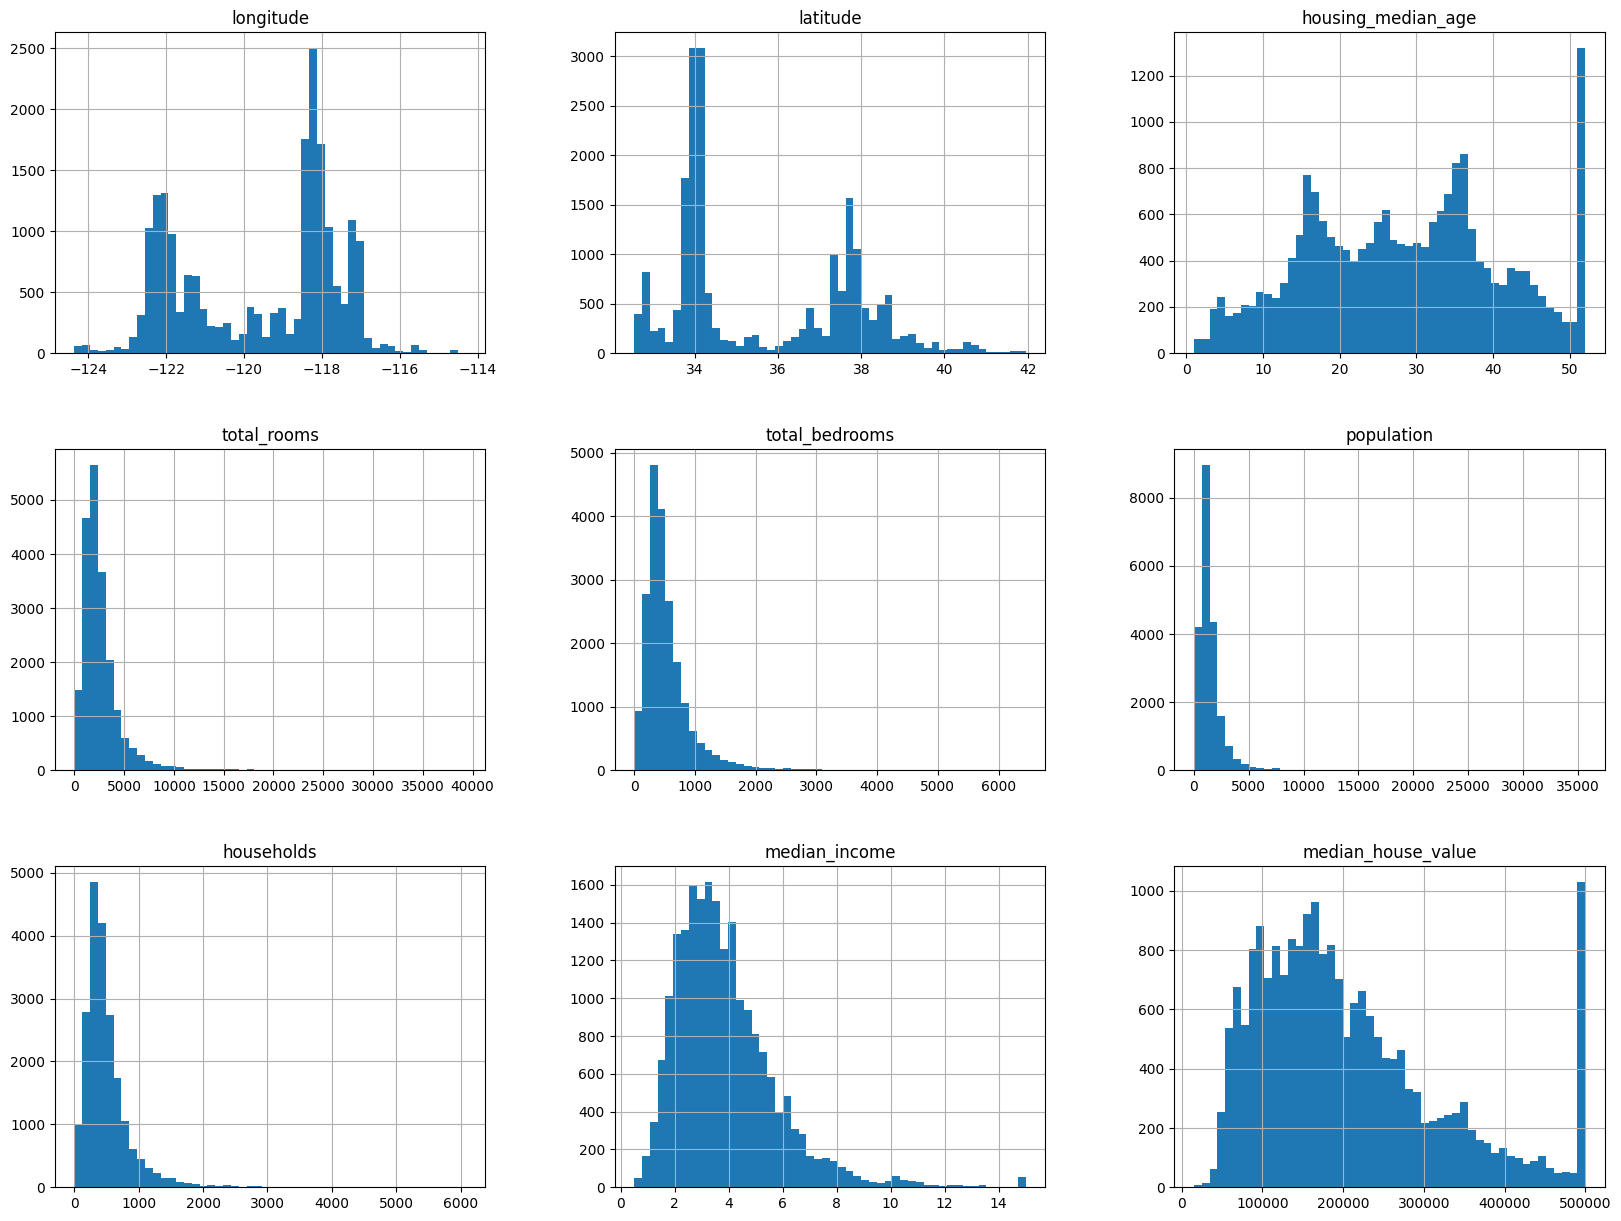

In [7]:
housing.hist(bins=50,figsize=(20,15))

In [8]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
%matplotlib inline

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

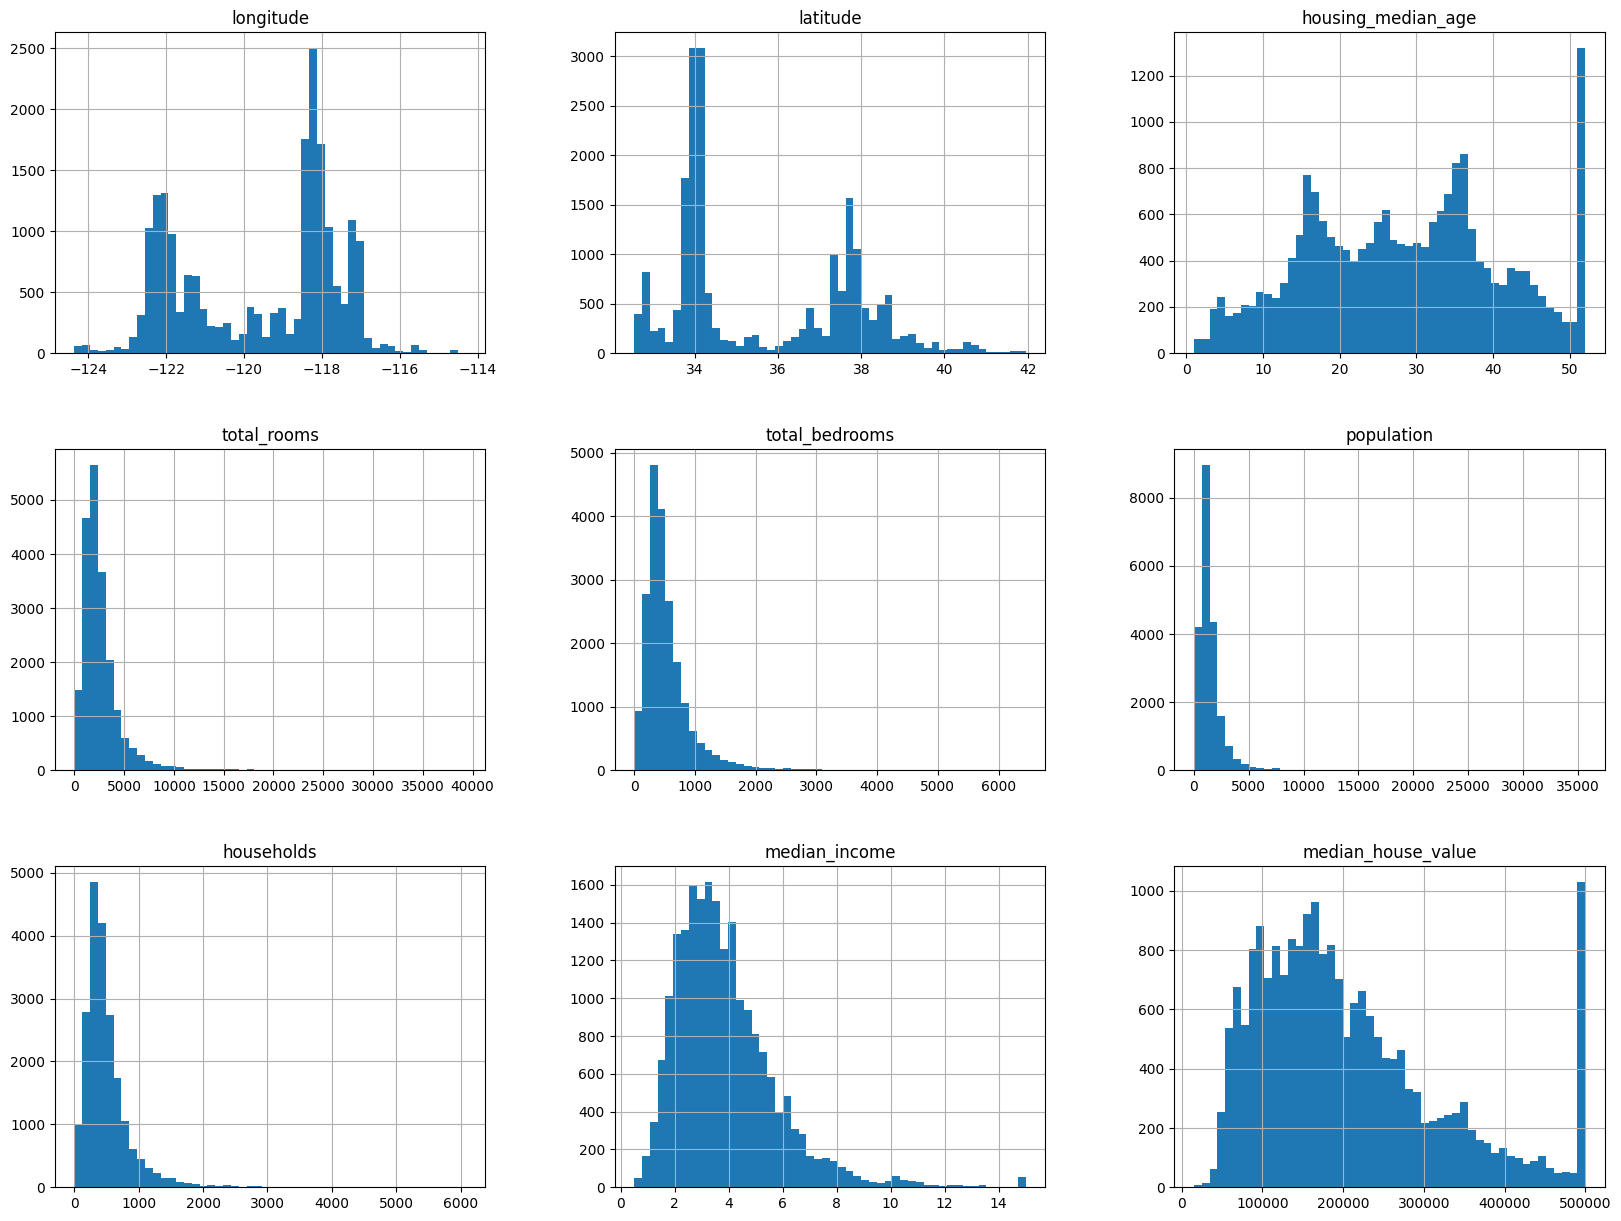

In [12]:
import matplotlib.pyplot as plt

housing.hist(bins=50,figsize=(20,15))

## CREATING A TEST SET

In [13]:
import numpy as pd

def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data) * test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]
    

In [14]:
train_set,test_set=split_train_test(housing,0.2)
len(train_set)


16512

In [15]:
len(test_set)

4128

In [16]:
import numpy as np

def test_set_check(identifier, test_ratio):
    return (np.int64(identifier) & 0xffffffff) < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]


In [17]:
housing_with_id=housing.reset_index()  # add an index column
train_set,test_set=split_train_test_by_id(housing_with_id,0.2,"index")



housing_with_id["id"]=housing["longitude"] * 1000 + housing["latitude"]
train_set,test_set=split_train_test_by_id(housing_with_id,0.2,"id")

In [18]:
from sklearn.model_selection import train_test_split

train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

In [19]:
import numpy as np
import pandas as pd
housing["income_cat"]=pd.cut(housing["median_income"],
                             bins=[0.,1.5,3.0,4.5,6.,np.inf],
                             labels=[1,2,3,4,5])

<Axes: >

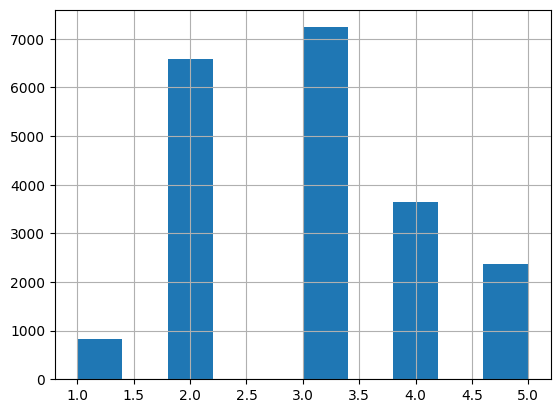

In [20]:
housing["income_cat"].hist()

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

    strat_test_set["income_cat"].value_counts()/ len(strat_test_set)

In [22]:
 strat_test_set["income_cat"].value_counts()/ len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [23]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)


In [24]:
housing=strat_train_set.copy

## Visualizing Geographical data

<function matplotlib.pyplot.show(close=None, block=None)>

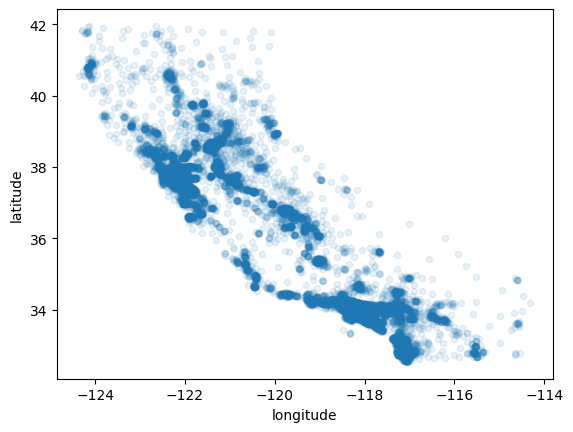

In [25]:
import pandas as pd
housing=pd.read_csv("housing.csv")
import matplotlib.pyplot as plt
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)
plt.show

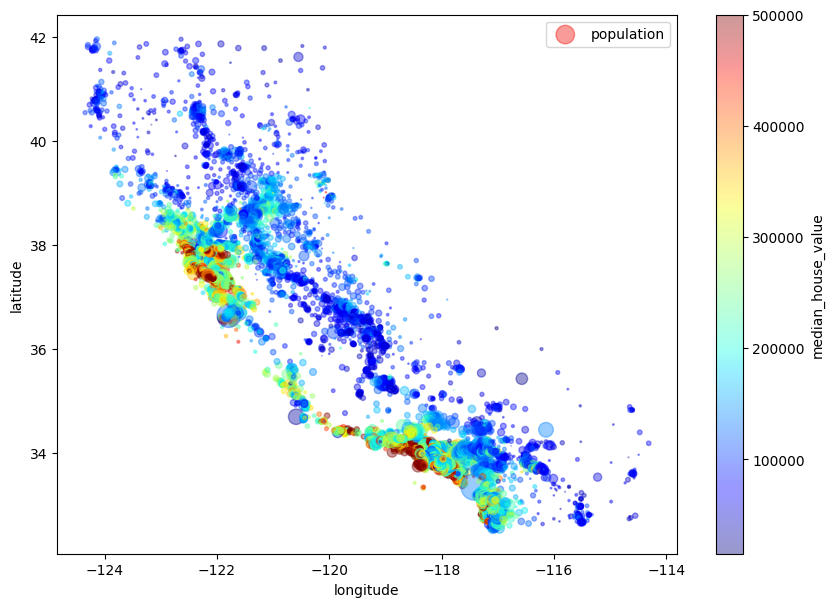

In [26]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,s=housing["population"]/100,label="population",figsize=(10,7),
c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True,)

plt.legend()

## Looking for correlations

In [27]:
corr_matrix=housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

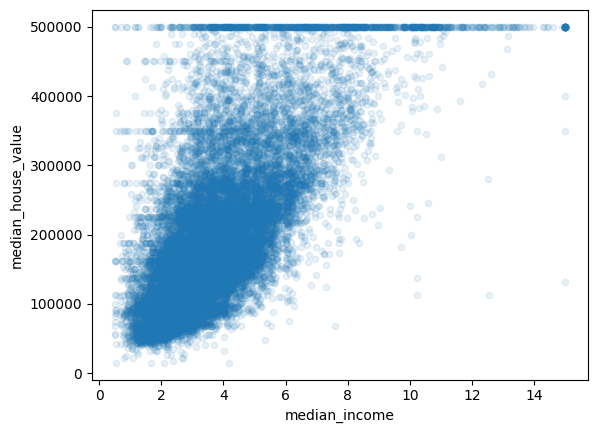

In [28]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)
plt.show()

In [29]:

housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

# and lets look the correlation matrix again
corr_matrix=housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [30]:
housing=strat_train_set.drop("median_house_value",axis=1)
housing_labels=strat_train_set["median_house_value"].copy()

In [31]:
from sklearn.impute import SimpleImputer # imputer is a estimator

imputer=SimpleImputer(strategy="median") # hyperparameter


In [32]:
housing_num=housing.drop("ocean_proximity",axis=1)

In [33]:
imputer.fit(housing_num)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [34]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [35]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [36]:
X=imputer.transform(housing_num)

##scikit learn design

In [37]:
housing_cat=housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [38]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [39]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [40]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [41]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], shape=(16512, 5))

In [42]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## custom transformer

In [43]:
from sklearn.base import BaseEstimator , TransformerMixin
rooms_ix,bedrooms_ix,population_ix,households_ix=3,4,5,6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # your constructor code here # no args* or **kargs
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self,X,y=None):
        return self #nothing esle to do
    def transform(self,X):
        rooms_per_household=X[:,rooms_ix]/X[:,households_ix]
        population_per_household=X[:,population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,
                bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]

            
attr_adder=CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs=attr_adder.transform(housing.values)


    
    

## Transformation pipelines

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),

])

housing_num_tr=num_pipeline.fit_transform(housing_num)

In [45]:
from sklearn.compose import ColumnTransformer

num_attribs=list(housing_num)
cat_attribs=["ocean_proximity"]


full_pipeline=ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("cat",OneHotEncoder(),cat_attribs),

])


housing_prepared=full_pipeline.fit_transform(housing)

## select and train model

In [46]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
some_data_prepared=full_pipeline.transform(some_data)
print("predictions:",lin_reg.predict(some_data_prepared))

predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [48]:
print("Labels:",list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [49]:
from sklearn.metrics import mean_squared_error
housing_predictions=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

np.float64(68627.87390018745)

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)




,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [51]:
from sklearn.metrics import mean_squared_error
housing_predictions=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_predictions,housing_labels)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

## better evaluation using cross-validation

In [52]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg,housing_prepared,housing_labels,
                       scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores=np.sqrt(-scores)

In [53]:
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation:",scores.std())

display_scores(tree_rmse_scores)    

Scores: [72251.22610062 70811.34799853 68000.08591434 71929.39104752
 69328.61392367 77963.99482744 71628.79228943 73511.78648072
 69045.58722762 69854.4073967 ]
Mean: 71432.52332065887
Standard deviation: 2696.6824522410743


In [54]:
lin_scores=cross_val_score(lin_reg,housing_prepared,housing_labels,
                           scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores=np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180584


In [55]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [56]:
from sklearn.metrics import mean_squared_error
housing_predictions=forest_reg.predict(housing_prepared)
forest_mse=mean_squared_error(housing_predictions,housing_labels)
forest_rmse=np.sqrt(forest_mse)
forest_rmse


np.float64(18733.78842762556)

In [57]:
forest_scores=cross_val_score(forest_reg,housing_prepared,housing_labels,
                           scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores=np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

Scores: [51340.22553753 49240.079874   46976.40445657 51917.1921677
 47035.53338226 51829.80557131 52841.15437862 49525.18429381
 47962.29506428 54069.20606905]
Mean: 50273.7080795117
Standard deviation: 2357.685647654302


## fine tune your model

In [71]:
from sklearn.model_selection import GridSearchCV

param_grid=[
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
]

forest_reg=RandomForestRegressor()

grid_search=GridSearchCV(forest_reg,param_grid,cv=5,
                         scoring='neg_mean_squared_error',
                         return_train_score=True)

grid_search.fit(housing_prepared,housing_labels)




,estimator,RandomForestRegressor()
,param_grid,"[{'max_features': [2, 4, ...], 'n_estimators': [3, 10, ...]}, {'bootstrap': [False], 'max_features': [2, 3, ...], 'n_estimators': [3, 10]}]"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,30


In [72]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [60]:
grid_search.best_estimator_

,n_estimators,30
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,6
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [61]:
cvres=grid_search.cv_results_
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

63298.325280791854 {'max_features': 2, 'n_estimators': 3}
55270.34904709105 {'max_features': 2, 'n_estimators': 10}
52764.37907812309 {'max_features': 2, 'n_estimators': 30}
59915.231517953645 {'max_features': 4, 'n_estimators': 3}
52250.00971218671 {'max_features': 4, 'n_estimators': 10}
50523.76956271084 {'max_features': 4, 'n_estimators': 30}
58765.92610607112 {'max_features': 6, 'n_estimators': 3}
51730.966110363326 {'max_features': 6, 'n_estimators': 10}
49946.273624879475 {'max_features': 6, 'n_estimators': 30}
59277.60503739721 {'max_features': 8, 'n_estimators': 3}
52330.73545038374 {'max_features': 8, 'n_estimators': 10}
50227.668503643676 {'max_features': 8, 'n_estimators': 30}
62861.2715675933 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53857.8212549715 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60006.561171063295 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52604.14159908305 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [62]:
feature_importances=grid_search.best_estimator_.feature_importances_
feature_importances

array([8.02540413e-02, 7.30975513e-02, 4.21462904e-02, 1.94599329e-02,
       1.66305656e-02, 1.82993131e-02, 1.50495682e-02, 3.03111918e-01,
       6.20480248e-02, 1.06221557e-01, 8.14535860e-02, 9.36554568e-03,
       1.67342766e-01, 6.92925556e-05, 1.89090481e-03, 3.55914297e-03])

In [63]:
extra_attribs=["rooms_per_hhold","pop_per_hhold","bedrooms_per_room"]
cat_encoder=full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs=list(cat_encoder.categories_[0])
attributes=num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances,attributes),reverse=True)
                         

[(np.float64(0.3031119176071169), 'median_income'),
 (np.float64(0.16734276601874726), 'INLAND'),
 (np.float64(0.10622155666897516), 'pop_per_hhold'),
 (np.float64(0.0814535860261664), 'bedrooms_per_room'),
 (np.float64(0.08025404133343494), 'longitude'),
 (np.float64(0.07309755133984223), 'latitude'),
 (np.float64(0.06204802478201258), 'rooms_per_hhold'),
 (np.float64(0.04214629041432651), 'housing_median_age'),
 (np.float64(0.019459932868257434), 'total_rooms'),
 (np.float64(0.018299313106456588), 'population'),
 (np.float64(0.01663056564371583), 'total_bedrooms'),
 (np.float64(0.01504956816998999), 'households'),
 (np.float64(0.009365545680866467), '<1H OCEAN'),
 (np.float64(0.0035591429730958816), 'NEAR OCEAN'),
 (np.float64(0.001890904811381891), 'NEAR BAY'),
 (np.float64(6.92925556139685e-05), 'ISLAND')]

## evaluate your system on the test set

In [64]:
final_model=grid_search.best_estimator_

In [65]:
X_test=strat_test_set.drop("median_house_value",axis=1)
y_test=strat_test_set["median_house_value"].copy()

In [66]:
X_test_prepared=full_pipeline.transform(X_test)

final_prediction=final_model.predict(X_test_prepared)

final_mse=mean_squared_error(y_test,final_prediction)
final_rmse=np.sqrt(final_mse)

In [67]:
final_mse

2255441202.294305

In [68]:
final_rmse

np.float64(47491.48557683056)

In [69]:
from scipy import stats
confidence=0.95
squared_error=(final_prediction - y_test)**2
np.sqrt(stats.t.interval(confidence,len(squared_error)-1,
                         loc=squared_error.mean(),
                         scale=stats.sem(squared_error)))
        

array([45481.8075141 , 49419.50616749])

In [70]:
import joblib

final_pipeline = Pipeline([
    ("preprocessing", full_pipeline),
    ("model", final_model)
])

joblib.dump(final_pipeline, "housing_model.pkl")
print("Model saved successfully!")


Model saved successfully!
